In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/Movie_reviews.csv


In [30]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer ##stemming purpose
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics
from six import string_types
from string import punctuation
from nltk import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [6]:
movie_reviews=pd.read_csv('/kaggle/input/movie-review/Movie_reviews.csv')

In [7]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
y=pd.get_dummies(movie_reviews['sentiment'],drop_first=True)
y

,positive
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [10]:
##  remove special character and html tags
reviews_html_removed=movie_reviews['review'].str.replace('<.*?>', '')
messages = reviews_html_removed.str.replace('[^a-zA-Z\s]', '')
messages


0        One of the other reviewers has mentioned that ...
1        A wonderful little production The filming tech...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [11]:
#Convert reviews into lowercase
messages=messages.str.lower()
messages

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [12]:
#Removal of stop words
docs = messages.apply(remove_stopwords)
docs

0        reviewers mentioned watching oz episode youll ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment maltin seco...
49999    expects star trek movies high art fans expect ...
Name: review, Length: 50000, dtype: object

In [13]:
#Apply stemming
ps = PorterStemmer()
docs = ps.stem_documents(docs)

In [14]:
#create BOW model
cv = CountVectorizer(max_features=3500)
X = cv.fit_transform(docs).toarray()

In [15]:
X.shape,y.shape

((50000, 3500), (50000, 1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
# Training model using Naive bayes classifier
review_classify_model = MultinomialNB().fit(X_train, y_train)


Training performance
Training accuracy score 0.843
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     19965
           1       0.85      0.84      0.84     20035

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000

confusion_matrix [[16917  3048]
 [ 3231 16804]]


<AxesSubplot:>

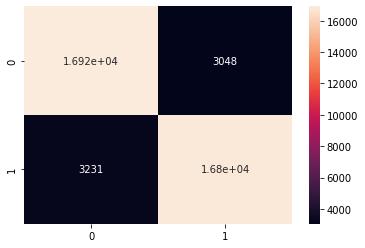

In [18]:
# training data performance metrics
ypred_train=review_classify_model.predict(X_train)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train,ypred_train))
print(classification_report(y_train,ypred_train))
print('confusion_matrix',confusion_matrix(y_train,ypred_train))
sns.heatmap(confusion_matrix(y_train,ypred_train),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.831
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5035
           1       0.83      0.83      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion_matrix [[4214  821]
 [ 865 4100]]


<AxesSubplot:>

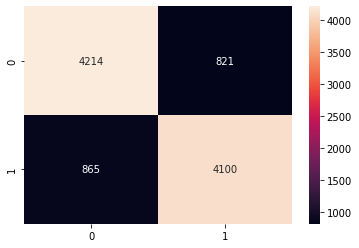

In [19]:
# testing accuarcy

ypred_test=review_classify_model.predict(X_test)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test,ypred_test))
print(classification_report(y_test,ypred_test))
print('confusion_matrix',confusion_matrix(y_test,ypred_test))
sns.heatmap(confusion_matrix(y_test,ypred_test),annot=True,fmt=".4g")



In [24]:
#Using tfidf
tv = TfidfVectorizer(max_features=3500)
X1 = tv.fit_transform(docs).toarray()

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.20, random_state = 0)

In [26]:
tfidf_model = MultinomialNB().fit(X_train1, y_train1)

Training performance
Training accuracy score 0.841
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     19965
           1       0.83      0.87      0.85     20035

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000

confusion_matrix [[16284  3681]
 [ 2665 17370]]


<AxesSubplot:>

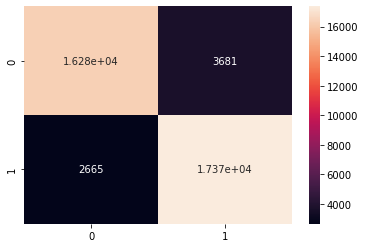

In [27]:
# training data performance metrics
ypred_train1=review_classify_model.predict(X_train1)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train1,ypred_train1))
print(classification_report(y_train1,ypred_train1))
print('confusion_matrix',confusion_matrix(y_train1,ypred_train1))
sns.heatmap(confusion_matrix(y_train1,ypred_train1),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.829
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      5035
           1       0.81      0.85      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion_matrix [[4048  987]
 [ 727 4238]]


<AxesSubplot:>

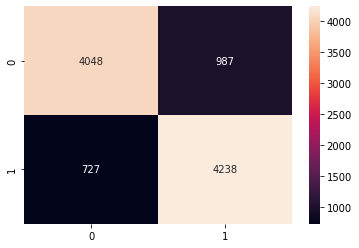

In [28]:
# testing accuarcy

ypred_test1=review_classify_model.predict(X_test1)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test1,ypred_test1))
print(classification_report(y_test1,ypred_test1))
print('confusion_matrix',confusion_matrix(y_test1,ypred_test1))
sns.heatmap(confusion_matrix(y_test1,ypred_test1),annot=True,fmt=".4g")

In [32]:
rf=RandomForestClassifier(n_estimators=50,random_state=40)
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50, random_state=40)

Training performance
Training accuracy score 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19965
           1       1.00      1.00      1.00     20035

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

confusion_matrix [[19964     1]
 [    1 20034]]


<AxesSubplot:>

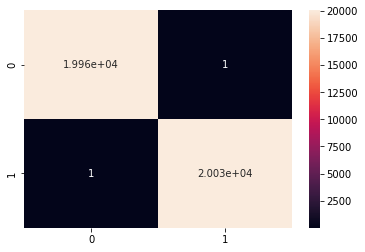

In [33]:
# training data performance metrics
ypred_train=rf.predict(X_train)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train,ypred_train))
print(classification_report(y_train,ypred_train))
print('confusion_matrix',confusion_matrix(y_train,ypred_train))
sns.heatmap(confusion_matrix(y_train,ypred_train),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.831
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      5035
           1       0.84      0.81      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion_matrix [[4278  757]
 [ 932 4033]]


<AxesSubplot:>

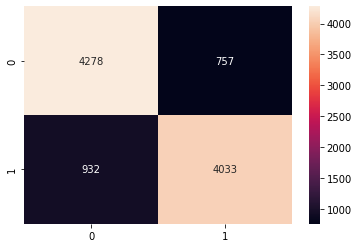

In [35]:
 #testing accuarcy

ypred_test=rf.predict(X_test)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test,ypred_test))
print(classification_report(y_test,ypred_test))
print('confusion_matrix',confusion_matrix(y_test,ypred_test))
sns.heatmap(confusion_matrix(y_test,ypred_test),annot=True,fmt=".4g")

